In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
import random
from sklearn.cluster import AgglomerativeClustering


In [41]:
from scipy.cluster.hierarchy import fclusterdata
from math import radians, cos, sin, asin, sqrt

def haversine(P1, P2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [P1[0], P1[1], P2[0], P2[1]])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r



In [42]:
df = pd.read_csv('2012-12-31.csv')
df.head()

,date,lat_bin,lon_bin,mmsi,fishing_hours
0,2012-12-31,0,1742,441062000,1.214583
1,2012-12-31,0,1743,441062000,0.850972
2,2012-12-31,256,-187,204232000,2.506389
3,2012-12-31,256,-186,204232000,2.892500
4,2012-12-31,256,1740,431725000,2.454306


In [43]:
df.tail()

,date,lat_bin,lon_bin,mmsi,fishing_hours
7368,2012-12-31,-1,1739,441062000,1.773611
7369,2012-12-31,-1,1743,441062000,0.194861
7370,2012-12-31,-1,1740,441062000,1.821111
7371,2012-12-31,-1,1742,441062000,0.644444
7372,2012-12-31,-1,1741,441062000,0.986250


In [44]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373 entries, 0 to 7372
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           7373 non-null   object 
 1   lat_bin        7373 non-null   int64  
 2   lon_bin        7373 non-null   int64  
 3   mmsi           7373 non-null   int64  
 4   fishing_hours  7373 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 288.1+ KB
Index(['date', 'lat_bin', 'lon_bin', 'mmsi', 'fishing_hours'], dtype='object')


In [45]:
df= df.sample(frac = 0.15) 

In [46]:
df.lat_bin = df.lat_bin/10
df.lon_bin = df.lon_bin/10

(Text(0.5, 1.0, 'lon Vs lat'), Text(0.5, 0, 'lon'), Text(0, 0.5, 'lat'))

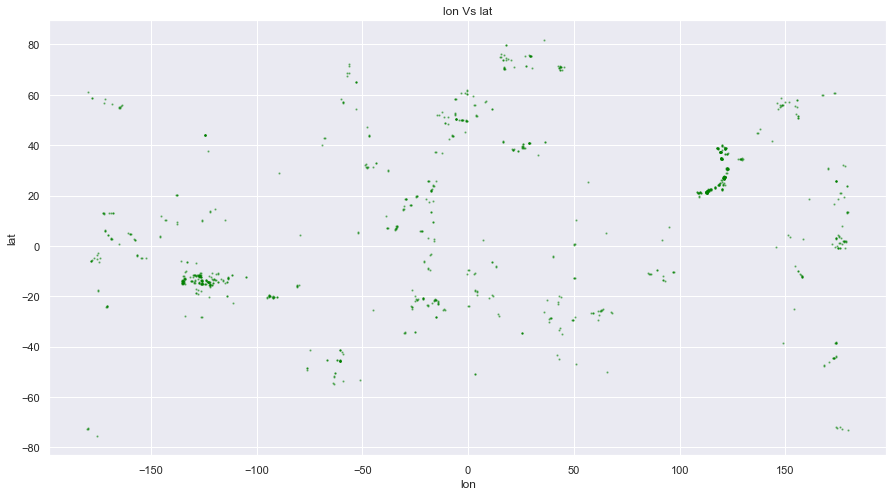

In [47]:
plt.figure(figsize=(15,8))

X1 = df.loc[:,["lon_bin","lat_bin"]]
X1 = X1.values
plt.scatter(X1[:, 0], X1[:, 1], alpha= 0.4, s=np.pi/2, color="green")
plt.title("lon Vs lat"), plt.xlabel('lon'), plt.ylabel('lat')


In [48]:
# HC = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
# HC.fit(X1)
# y1 = HC.labels_

In [49]:
fclust1 = fclusterdata(X1, 10, criterion='maxclust', metric=haversine)

In [50]:
colors = []
for i in range(10):

    r = random.random()
    b = random.random()
    g = random.random()
    colors.append((r, g, b))

In [51]:
len(set(fclust1))

10

In [52]:
len(X1)

1106

In [53]:
print(X1)

[[-168.3   56.4]
 [  35.7   81.7]
 [ 122.8   30.5]
 ...
 [  -6.1   51.8]
 [ 112.9   21.8]
 [ 122.6   36.7]]


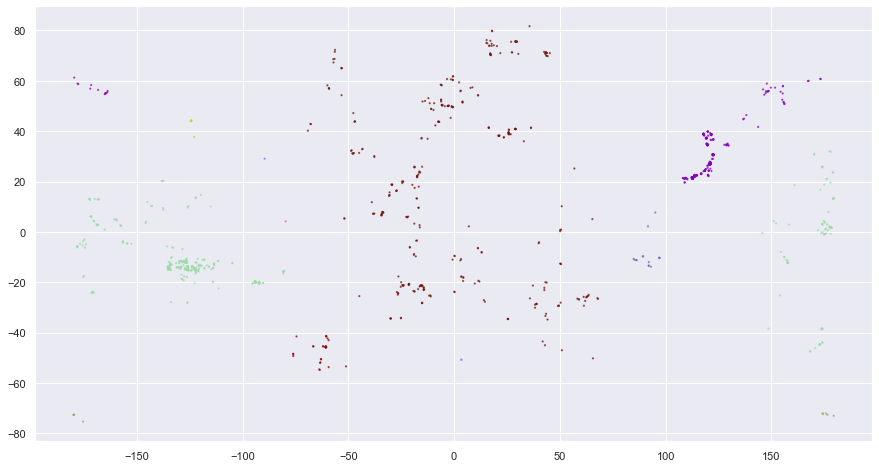

In [54]:
plt.figure(figsize=(15,8))
plt.scatter(X1[:, 0], X1[:, 1], c=[colors[fclust1[i] - 1] for i in range(len(X1))], s=np.pi/2, cmap='viridis', alpha = 0.6)

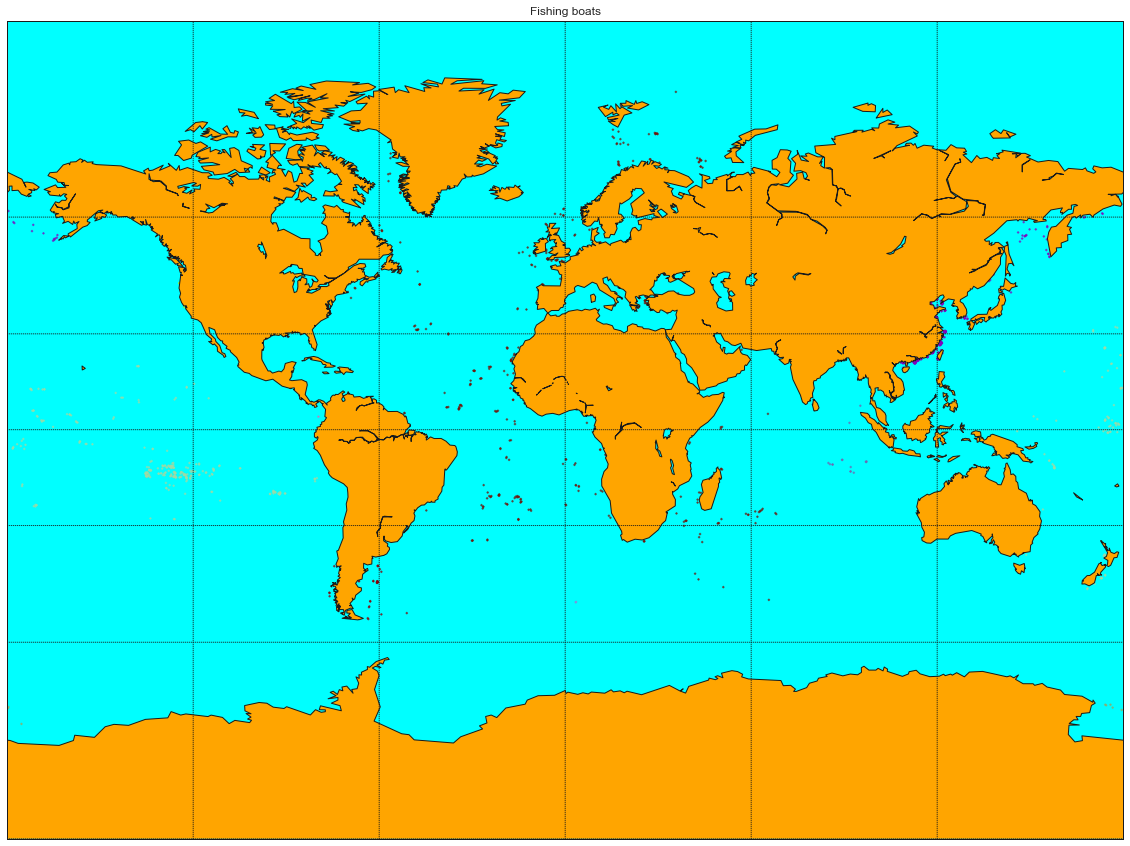

In [55]:
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
x,y = m(X1[:, 0],X1[:, 1])
m.scatter(x,y, c=[colors[fclust1[i] - 1] for i in range(len(X1))] ,marker='D', s=np.pi/2, cmap='viridis', alpha = 0.6)

plt.title("Fishing boats")
plt.show()

In [ ]:
# Focus on a region

llat=-14
ulat=51
llon=46
ulon=151

df=df[(df['lon_bin']>llon) & (df['lon_bin']<ulon) & 
      (df['lat_bin']>llat) & (df['lat_bin']<ulat)]
print("Number of final datapoints:",len(df))

In [ ]:
plt.figure(figsize=(20,15))

m = Basemap(projection='mill',llcrnrlat=llat,urcrnrlat=ulat,\
            llcrnrlon=llon,urcrnrlon=ulon,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

lon_array = df.lon_bin.to_numpy()
lat_array = df.lat_bin.to_numpy()
x,y = m(lon_array,lat_array)
m.scatter(x,y,color="green",marker='D',s=np.pi*2)
plt.title("Fishing boats")
plt.show()

In [ ]:
X2 = df.loc[:,["lon_bin","lat_bin"]]
X2 = X2.values

In [ ]:
# HC = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
# HC.fit(X2)
# y2 = HC.labels_

In [ ]:
fclust1 = fclusterdata(X2, 10, criterion='maxclust', metric=haversine)

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X2[:, 0], X2[:, 1], c=[colors[fclust1[i] - 1] for i in range(len(X2))], s=np.pi/2, cmap='viridis', alpha = 0.6)

In [ ]:
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=llat,urcrnrlat=ulat,\
            llcrnrlon=llon,urcrnrlon=ulon,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='white')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='white')
x,y = m(X2[:, 0],X2[:, 1])
m.scatter(x,y, c=[colors[fclust1[i] - 1] for i in range(len(X2))] ,marker='D', s=np.pi/2, cmap='viridis', alpha = 0.6)
plt.title("Fishing boats")
plt.show()